# 对偶形式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcGramMaxtrix(X):
    m = X.shape[0]
    gram = np.zeros((m, m))
    for i in range(m):
        for j in range(i, m):
            gram[i, j] = X[i].dot(X[j])
            gram[j, i] = X[i].dot(X[j])
    return gram

def calcI(X, y, a, b, i, gram):
    #print (X.shape, y.shape, a. shape)
    sum = 0
    for j in range(X.shape[0]):
        sum += a[j] *y[j] * gram[j, i]
    return (sum + b)*y[i]
        
# 感知机原始形式
def perceptron(X, y, eta):
    a, b = np.zeros(X.shape[0]),0
    gram = calcGramMaxtrix(X)
    isFinished = False
    while not isFinished:
        isFinished = True
        for i in range(X.shape[0]):
            if calcI(X, y, a, b, i, gram) <= 0:
                isFinished = False
                a[i] += eta
                b += eta * y[i]
    def f(x):
        sum = 0
        for j in range(X.shape[0]):
            sum += a[j] *y[j] * X[j].dot(x)
        return sum + b
    return a, b, f

In [3]:
# 把结果打印出来
def plotModel(X, y, a, b, f):
    for x in X:
        if f(x) <= 0:
            plt.scatter(x[0],x[1], color='red')
        else:
            plt.scatter(x[0],x[1], color='blue')
    w = (a * y * X.T).T.sum(axis=0)
    print (w.shape)
    line_x0 = np.array([1, 5])
    if w[1] == 0:
        line_x0 = [-b/w[0], -b/w[0]]
        line_x1 = [-1, 3]
    else:
        line_x1 = np.array((-b - w[0]*line_x0) / w[1])
    #plt.scatter(X[index,0],X[index,1], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='#AB3319')
    plt.plot(line_x0, line_x1)
    plt.show()

(2,)


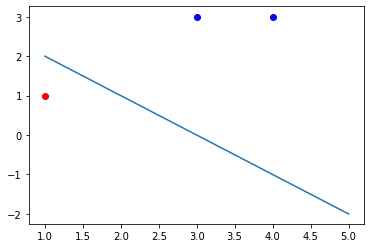

In [4]:
# 书上的例子
X = np.array([[3,3],[4,3],[1,1]])
y = np.array([1,1,-1])
w, b, f = perceptron(X, y, eta=1)
plotModel(X, y, w, b, f)

打一份线性可分的数据
我选择了skearn.datasets的iris数据第1类和第2类的后面两个特征

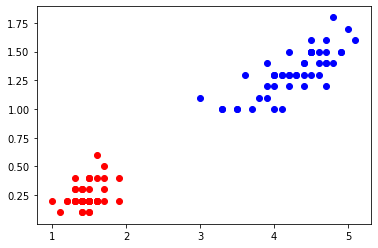

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,2:]
y = y[y<2]
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

In [6]:
y[y==0]=-1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

由于感知机要求的y的标签为-1和1，当前y的标签为0，1
需要把标签0全部改成标签-1

(2,)


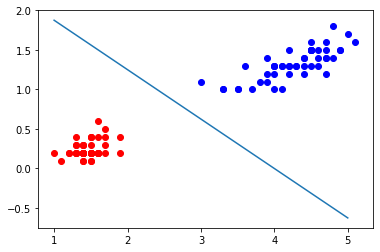

In [7]:
# iris数据
w, b, f = perceptron(X, y, eta=0.01)
plotModel(X, y, w, b, f)